In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [2]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 150

model = linearRegression(inputDim, outputDim)

In [3]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [4]:
def normalise(dataf):
    mu    = 0
    sigma = 0
    mu = dataf.mean()
    sigma = dataf.std( ddof=0)
    snorm = dataf
    snorm.columns = ['normalised']
    snorm =(snorm - mu )/ sigma
    dtnorm = pd.concat([dataf,snorm],  axis =1)
    dtnorm.columns = ['x', 'nx']
    print(mu, sigma)
    print(snorm.head(5))
    return dtnorm , mu , sigma

data = pd.read_csv('ex1data1.txt', header=None,sep =',', names= ['x','y'])
y = data['y'].to_numpy()
norm,mu, sigma = normalise(data['x'])
print(norm)
print(mu)
print(sigma)
X = norm['x'].to_numpy()
X_train = X.reshape(-1, 1)
X_train= X_train.astype(np.float32)
y_train = y.reshape(-1, 1)
y_train= y_train.astype(np.float32)

8.159800000000002 3.8498839959227156
0   -0.532406
1   -0.683683
2    0.093198
3   -0.300425
4   -0.597421
Name: x, dtype: float64
          x        nx
0    6.1101 -0.532406
1    5.5277 -0.683683
2    8.5186  0.093198
3    7.0032 -0.300425
4    5.8598 -0.597421
..      ...       ...
92   5.8707 -0.594589
93   5.3054 -0.741425
94   8.2934  0.034702
95  13.3940  1.359573
96   5.4369 -0.707268

[97 rows x 2 columns]
8.159800000000002
3.8498839959227156


In [5]:
history = []

for epoch in range(epochs):
    # Converting inputs and labels to Variable
    inputs = Variable(torch.from_numpy(X_train))
    labels = Variable(torch.from_numpy(y_train))
    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
   # print(loss.item())
    history.append(loss.item())
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()
   
   # print('epoch {}, loss {}'.format(epoch, loss.item()))
[w, b] = model.parameters()
print(w)
print(b)
print('intercept :' ,0 - model.linear.bias.data.numpy()[0])
print('slope :' , model.linear.weight.data.numpy()[0][0])


Parameter containing:
tensor([[0.9810]], requires_grad=True)
Parameter containing:
tensor([-1.7855], requires_grad=True)
intercept : 1.7855368852615356
slope : 0.9810368


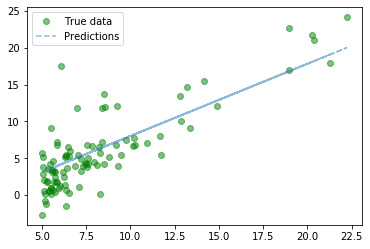

In [6]:
with torch.no_grad(): # we don't need gradients in the testing phase
    predicted = model(Variable(torch.from_numpy(X_train))).data.numpy()
    #print(predicted)

plt.clf()
plt.plot(X_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(X_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()


In [7]:
ww = -model.linear.bias.data.numpy()[0]
with torch.no_grad(): # we don't need gradients in the testing phase
    v =  torch.tensor([3.5])
    w = torch.tensor([7.0])
    orig = torch.tensor([ww ])
    test1 = model(v) 
    test2 = model(w)
    test3 = model(orig)
print(test1*10000,test2*10000, test3 * 10000)    


tensor([16480.9199]) tensor([50817.2070]) tensor([-338.5949])


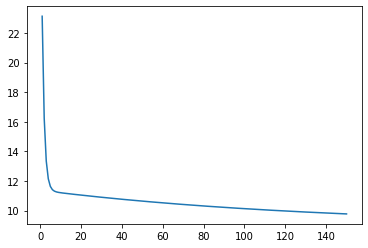

In [8]:
plt.clf
x_ = range(1, epochs +1 )
plt.plot(x_, history)